# Data generation
For curve fitting tutorial

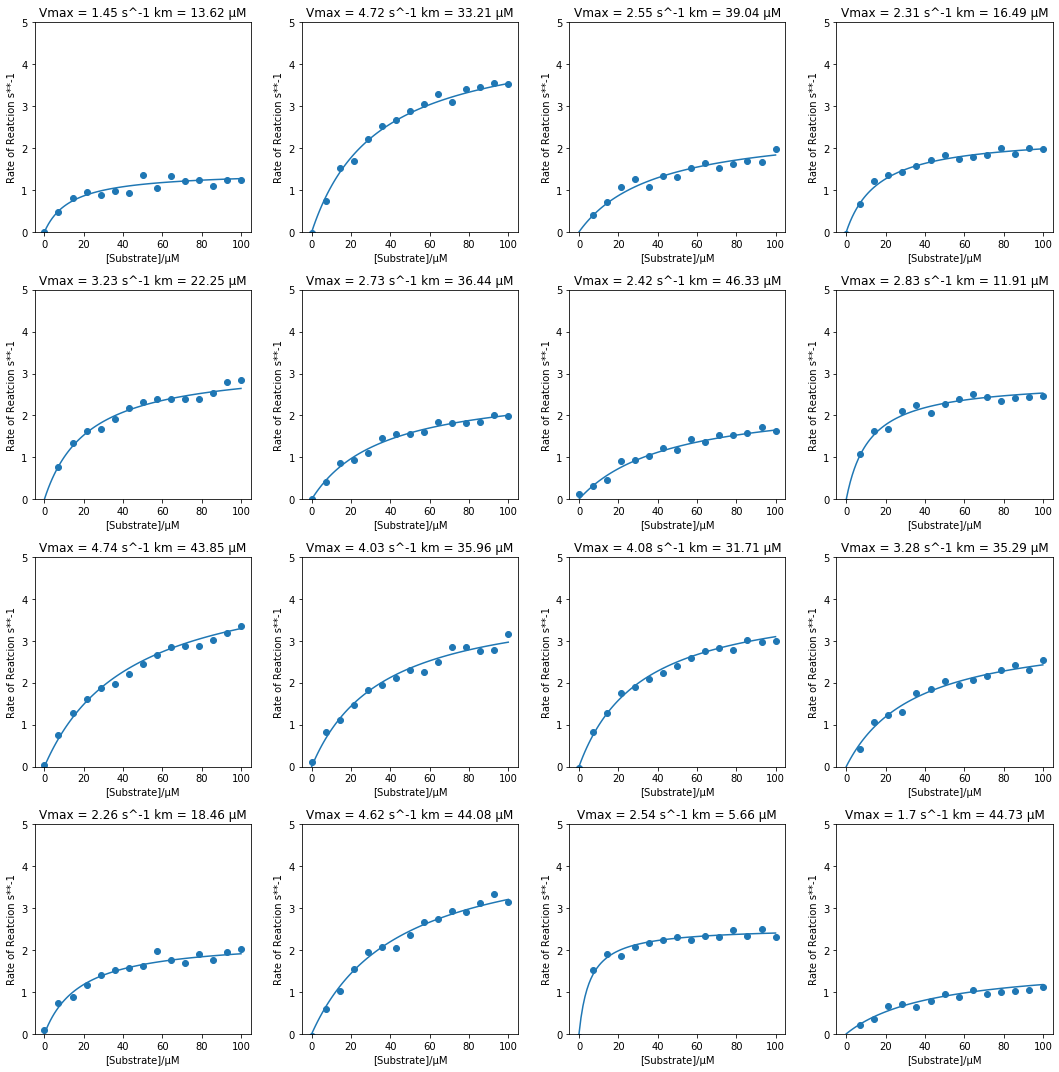

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# michaelis menten kinetics
# v = ð[product]/ð time = vmax*[substrate]/(km + [substrate])

def velocity(substrate_conc, vmax, km):
    return (vmax*substrate_conc)/(km + substrate_conc)


def make_mm_data(vmax, km):
    concs = np.linspace(0,100,15)
    noise_scale = 0.1
    v = np.array([velocity(i, vmax, km) + np.random.normal(0,noise_scale) for i in concs])
    return pd.DataFrame([concs, v], index = ['[Substrate]/µM','Reaction Rate']).T



fig, axes = plt.subplots(4,4, figsize = (15,15))
for ax in axes.flatten():
    vmax = np.random.uniform(1,5)
    km = np.random.uniform(5,50)
    data = make_mm_data(vmax, km)
    data.to_csv(f'Enzyme-vmax={round(vmax, 2)}-km={round(km, 2)}.csv')
    data.to_excel(f'Enzyme-vmax={round(vmax, 2)}-km={round(km, 2)}.xlsx')
    
    mm_line_scale = np.linspace(0,100,100)
    mm_line = np.array([velocity(i, vmax, km) for i in mm_line_scale])
    
    ax.scatter(data['[Substrate]/µM'], data['Reaction Rate'])
    ax.plot(mm_line_scale, mm_line)
    ax.set_ylabel('Rate of Reatcion s**-1')
    ax.set_xlabel('[Substrate]/µM')
    ax.set_ylim(0,5)
    ax.set_title(f'Vmax = {round(vmax, 2)} s^-1 km = {round(km, 2)} µM')
    
plt.tight_layout()
plt.show()

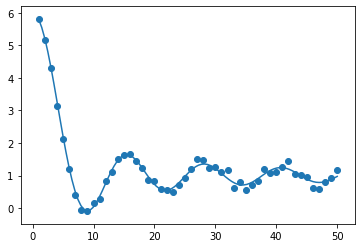

In [39]:
x = np.linspace(1,50,100)

def f(x, p1, p2):
    return 1 + np.sin(p1 * x) / (x*p2) 

p1 = 0.5
p2 = 0.1

y = f(x, p1, p2)

x2 = np.linspace(1,50, 50)
y2 = [i + np.random.normal(0,0.1) for i in f(x2, p1, p2)]


df = pd.DataFrame([x2,y2], index = ['Time (mins)', '']).T

plt.plot(x,y)
plt.scatter(x2, y2)
plt.show()